In [213]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [214]:
df.to_csv("../data/raw/total_data.csv", index = False)

#Tamaño de la data
df.shape

(48895, 16)

In [215]:
#Informacion del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [216]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [217]:
# en porcentaje
df.isnull().sum().sort_values(ascending=False) / len(df)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [218]:
#Duplicados en el DataFrame 
duplicados= df.duplicated()
print(duplicados)
duplicados.sum()

df_duplicados = df[duplicados]
df_sin_duplicados = df.drop_duplicates()
print(df_sin_duplicados)

#Eliminar duplicados
print(f"The Name is: {df['name'].duplicated().sum()}")
print(f"The Host ID is: {df['host_id'].duplicated().sum()}")
print(f"The ID is: {df['id'].duplicated().sum()}")

 
df.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df.head()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool
             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  3

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(7), object(

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


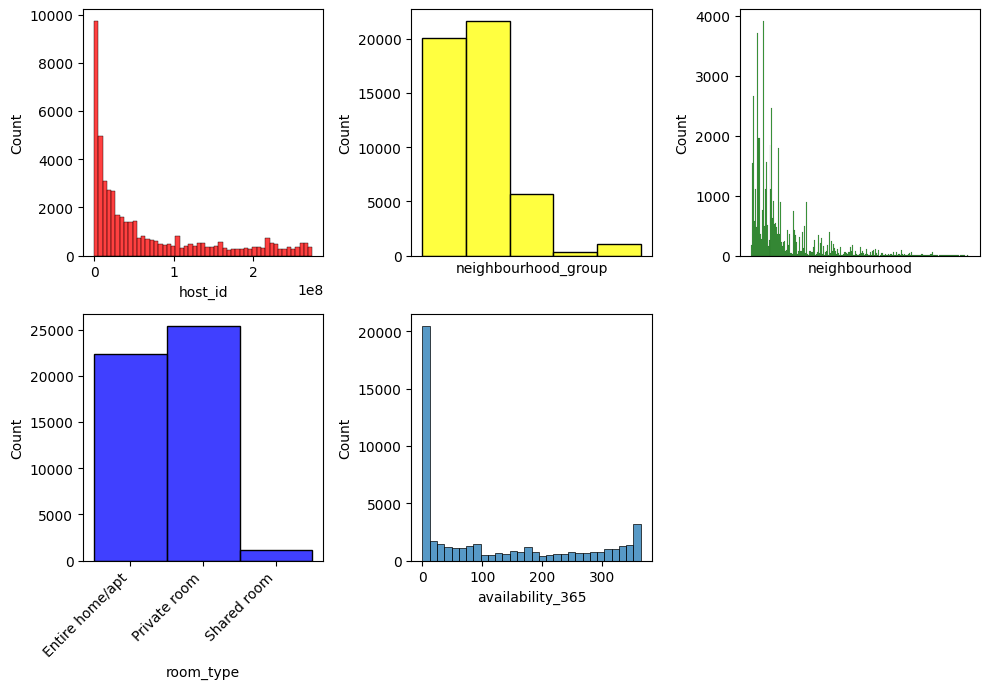

In [220]:
#Analisis de las variables categoricas

import matplotlib.pyplot as plt 
import seaborn as sns

#HISTOGRAMA

fig, axis = plt.subplots(2, 3, figsize=(10, 7))
sns.histplot(ax = axis[0,0], data = df, x = "host_id", color= "red" )
sns.histplot(ax = axis[0,1], data = df, x = "neighbourhood_group", color="yellow").set_xticks([])
sns.histplot(ax = axis[0,2], data = df, x = "neighbourhood", color="green").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "room_type", color="blue")
sns.histplot(ax = axis[1,1], data = df, x = "availability_365")
axis[1,0].set_xticks(df["room_type"].unique())
categorias = ["Entire home/apt", "Private room", "Shared room"]
print(df["room_type"].value_counts())
axis[1,0].set_xticks(range(len(categorias)))
axis[1,0].set_xticklabels(categorias, rotation=45, ha="right", fontsize=10)


fig.delaxes(axis[1, 2])
plt.tight_layout()
plt.show()


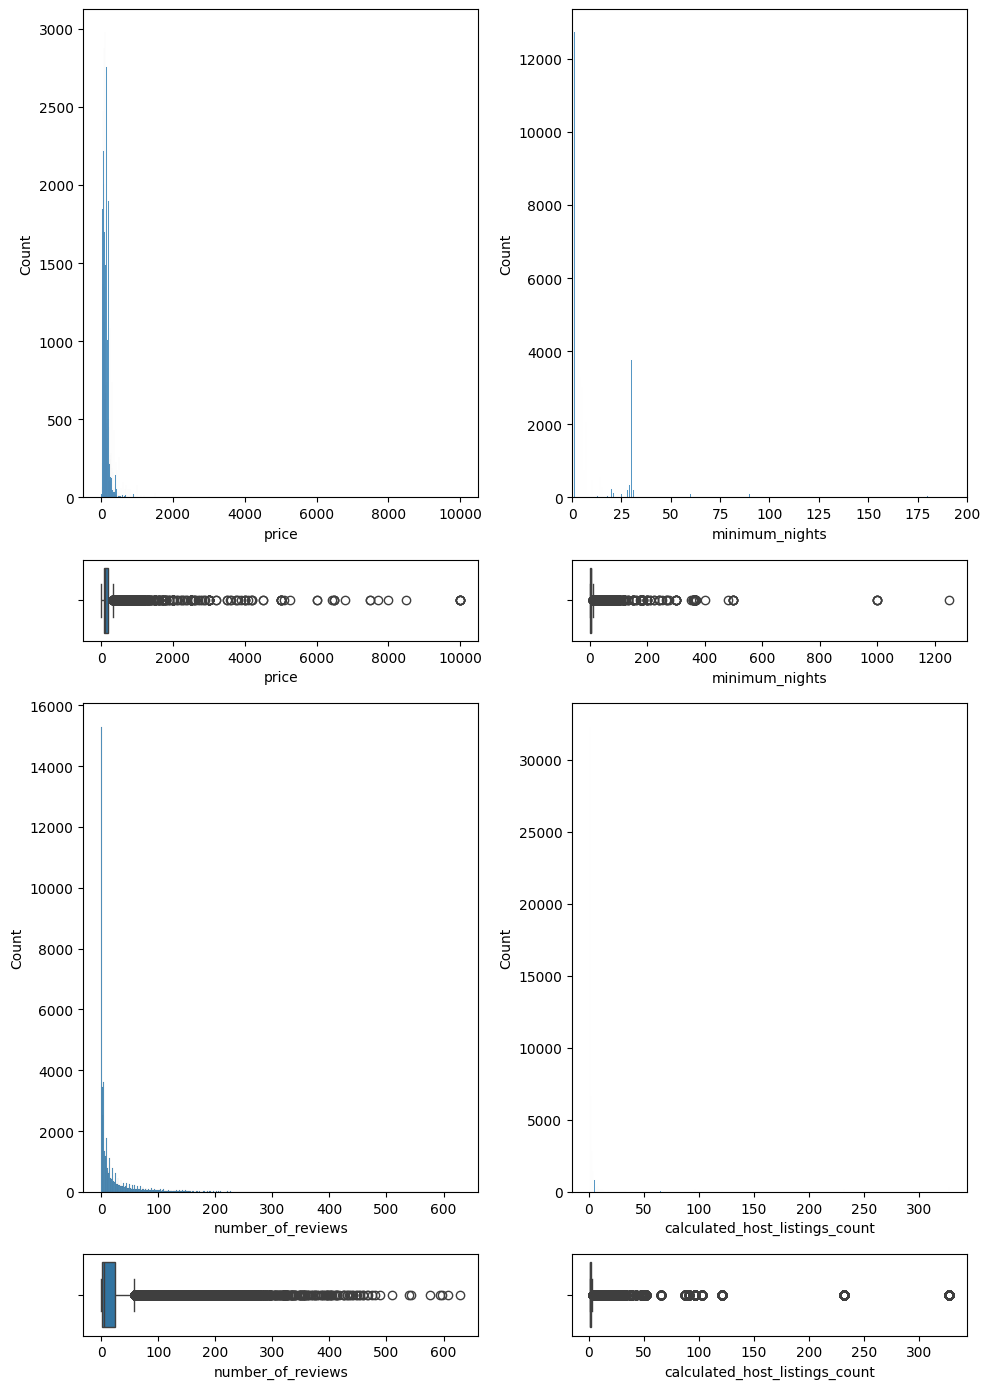

In [221]:
#ANALISIS NUMERICO DE LAS VARIABLES

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")
plt.tight_layout()
plt.show()

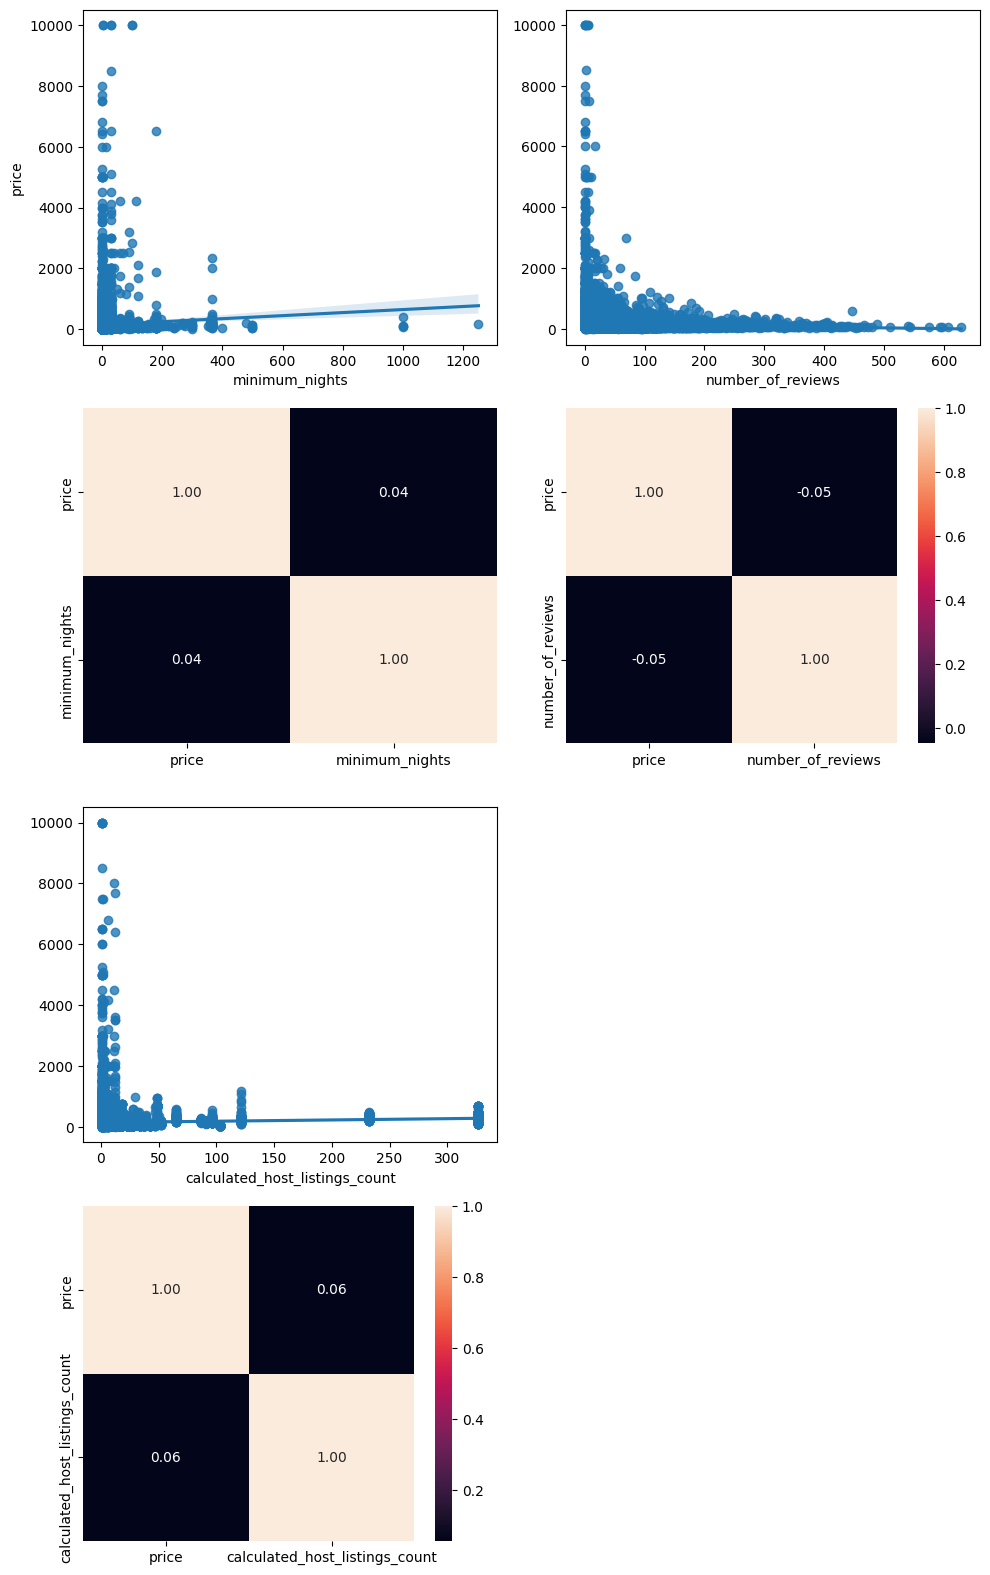

In [222]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

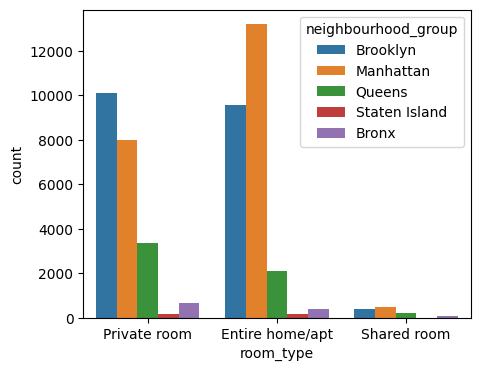

In [223]:
fig, axis = plt.subplots(figsize = (5, 4))
sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")
plt.show()

/tmp/ipykernel_675/2222792426.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), fontsize=9)
/tmp/ipykernel_675/2222792426.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), fontsize=9)


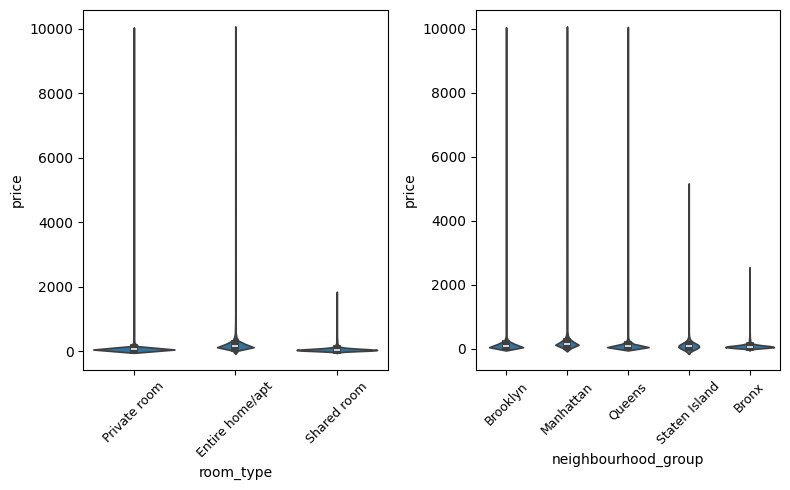

In [224]:

fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.violinplot(ax = axis[0], x='room_type', y='price', data=df)
sns.violinplot(ax = axis[1], x='neighbourhood_group', y='price', data=df)
axis[0].tick_params(axis='x', rotation=45)
axis[0].set_xticklabels(axis[0].get_xticklabels(), fontsize=9)
axis[1].tick_params(axis='x', rotation=45)
axis[1].set_xticklabels(axis[1].get_xticklabels(), fontsize=9)

plt.tight_layout()
plt.show()

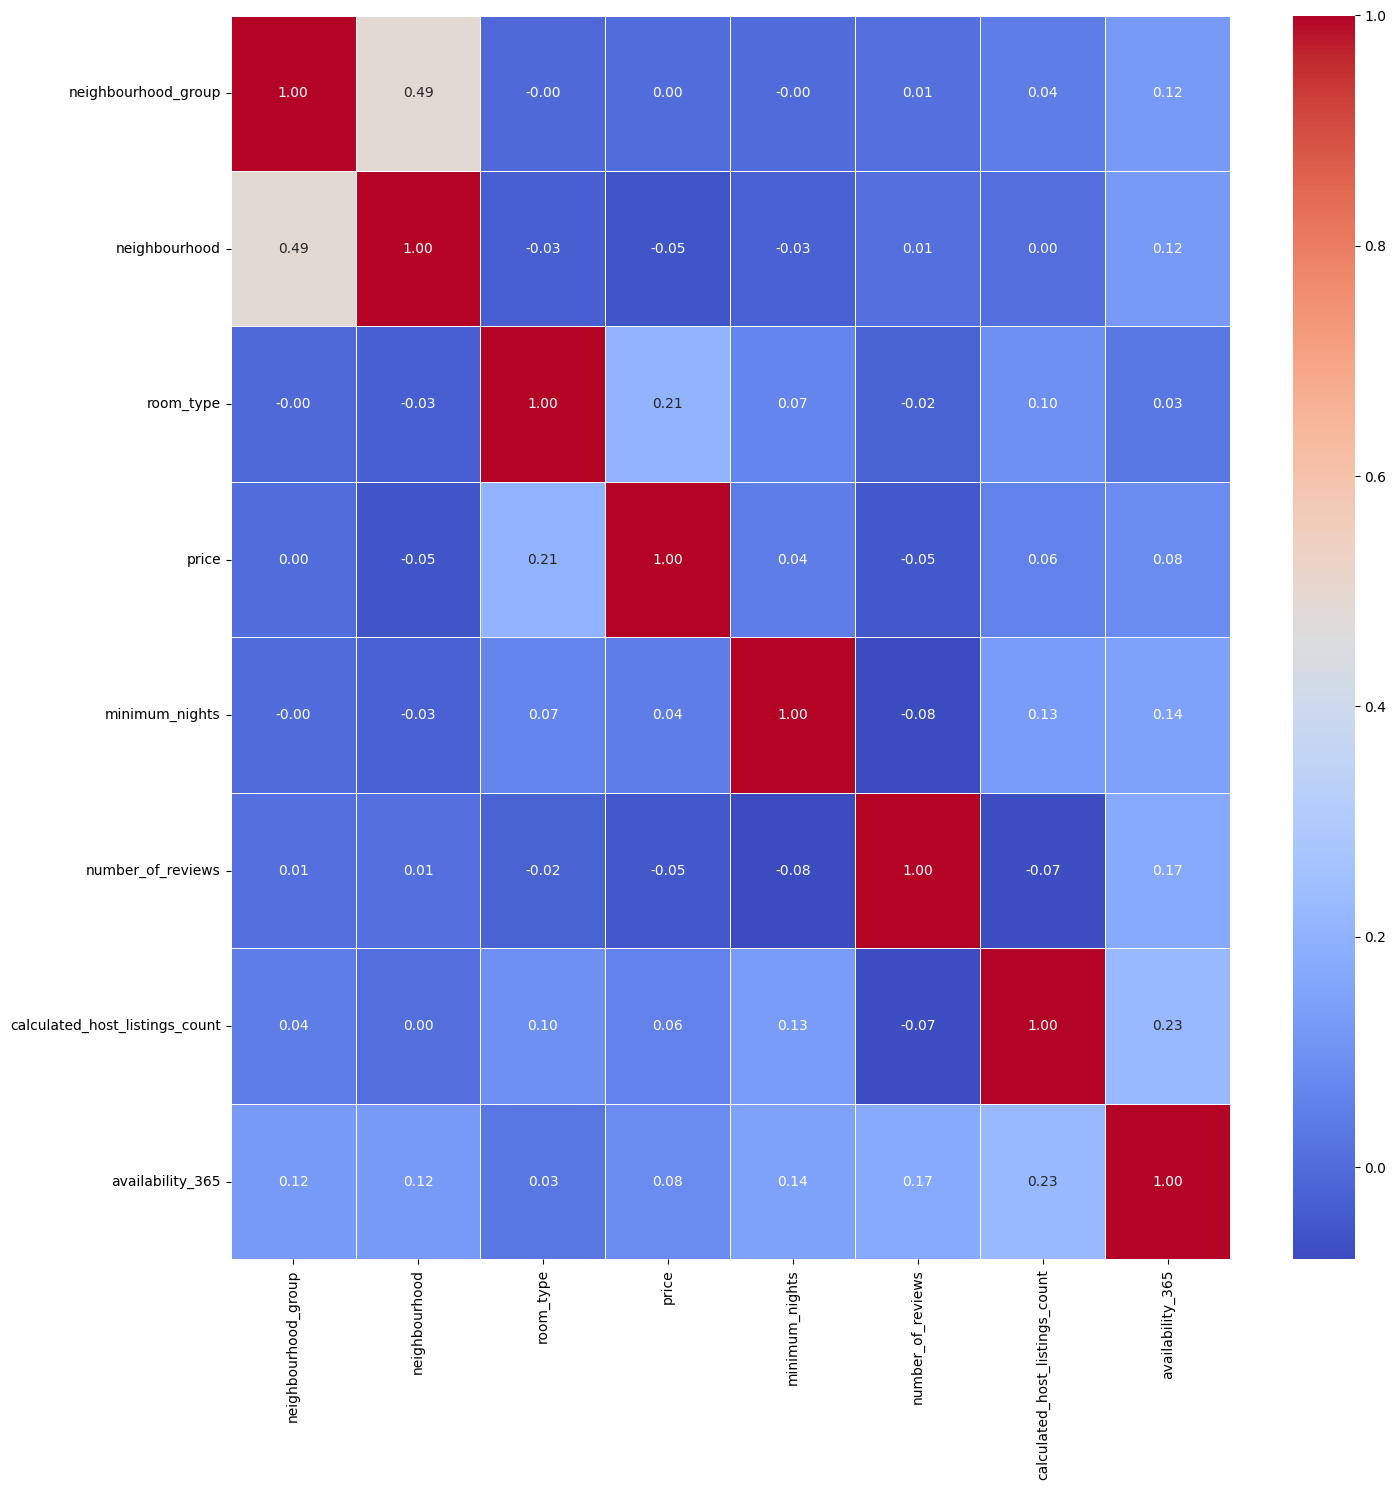

In [225]:
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f", cmap="coolwarm", linewidths=0.5)
plt.tight_layout()
plt.show()

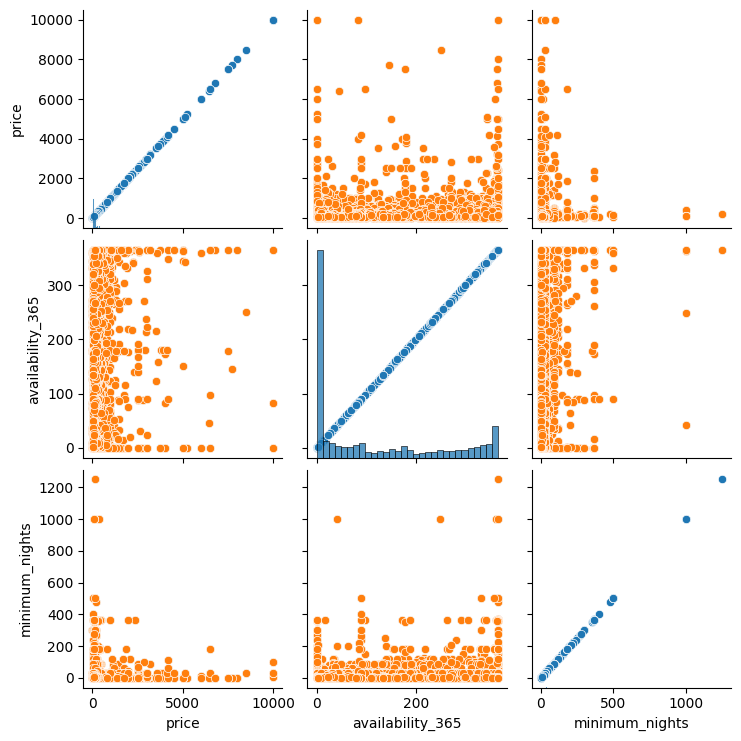

In [226]:
g= sns.pairplot(df, vars=["price", "availability_365", "minimum_nights"])
g.map(sns.scatterplot)
plt.show()

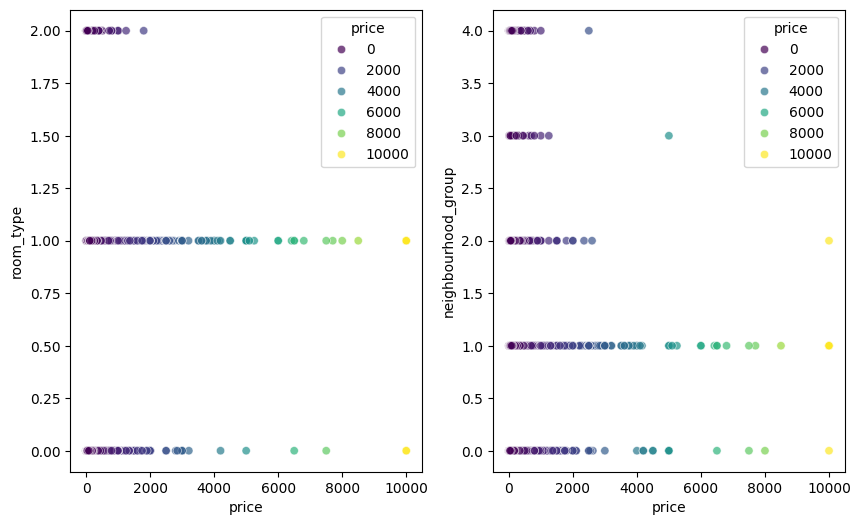

: 

In [ ]:
fig, axis = plt.subplots(figsize = (10, 6), ncols = 2)
df_filtrado = df[df['price'] > 0]
sns.scatterplot(ax = axis[0], data=df, x='price', y='room_type', hue='price', palette='viridis', alpha=0.7)
sns.scatterplot(ax = axis[1], data=df, x='price', y='neighbourhood_group', hue='price', palette='viridis', alpha=0.7)

plt.show()

Evaluamos la tarifa en relacion al tipo de habitacion y lugar

In [ ]:
# relaciones todos con todos
sns.pairplot(data = df)

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


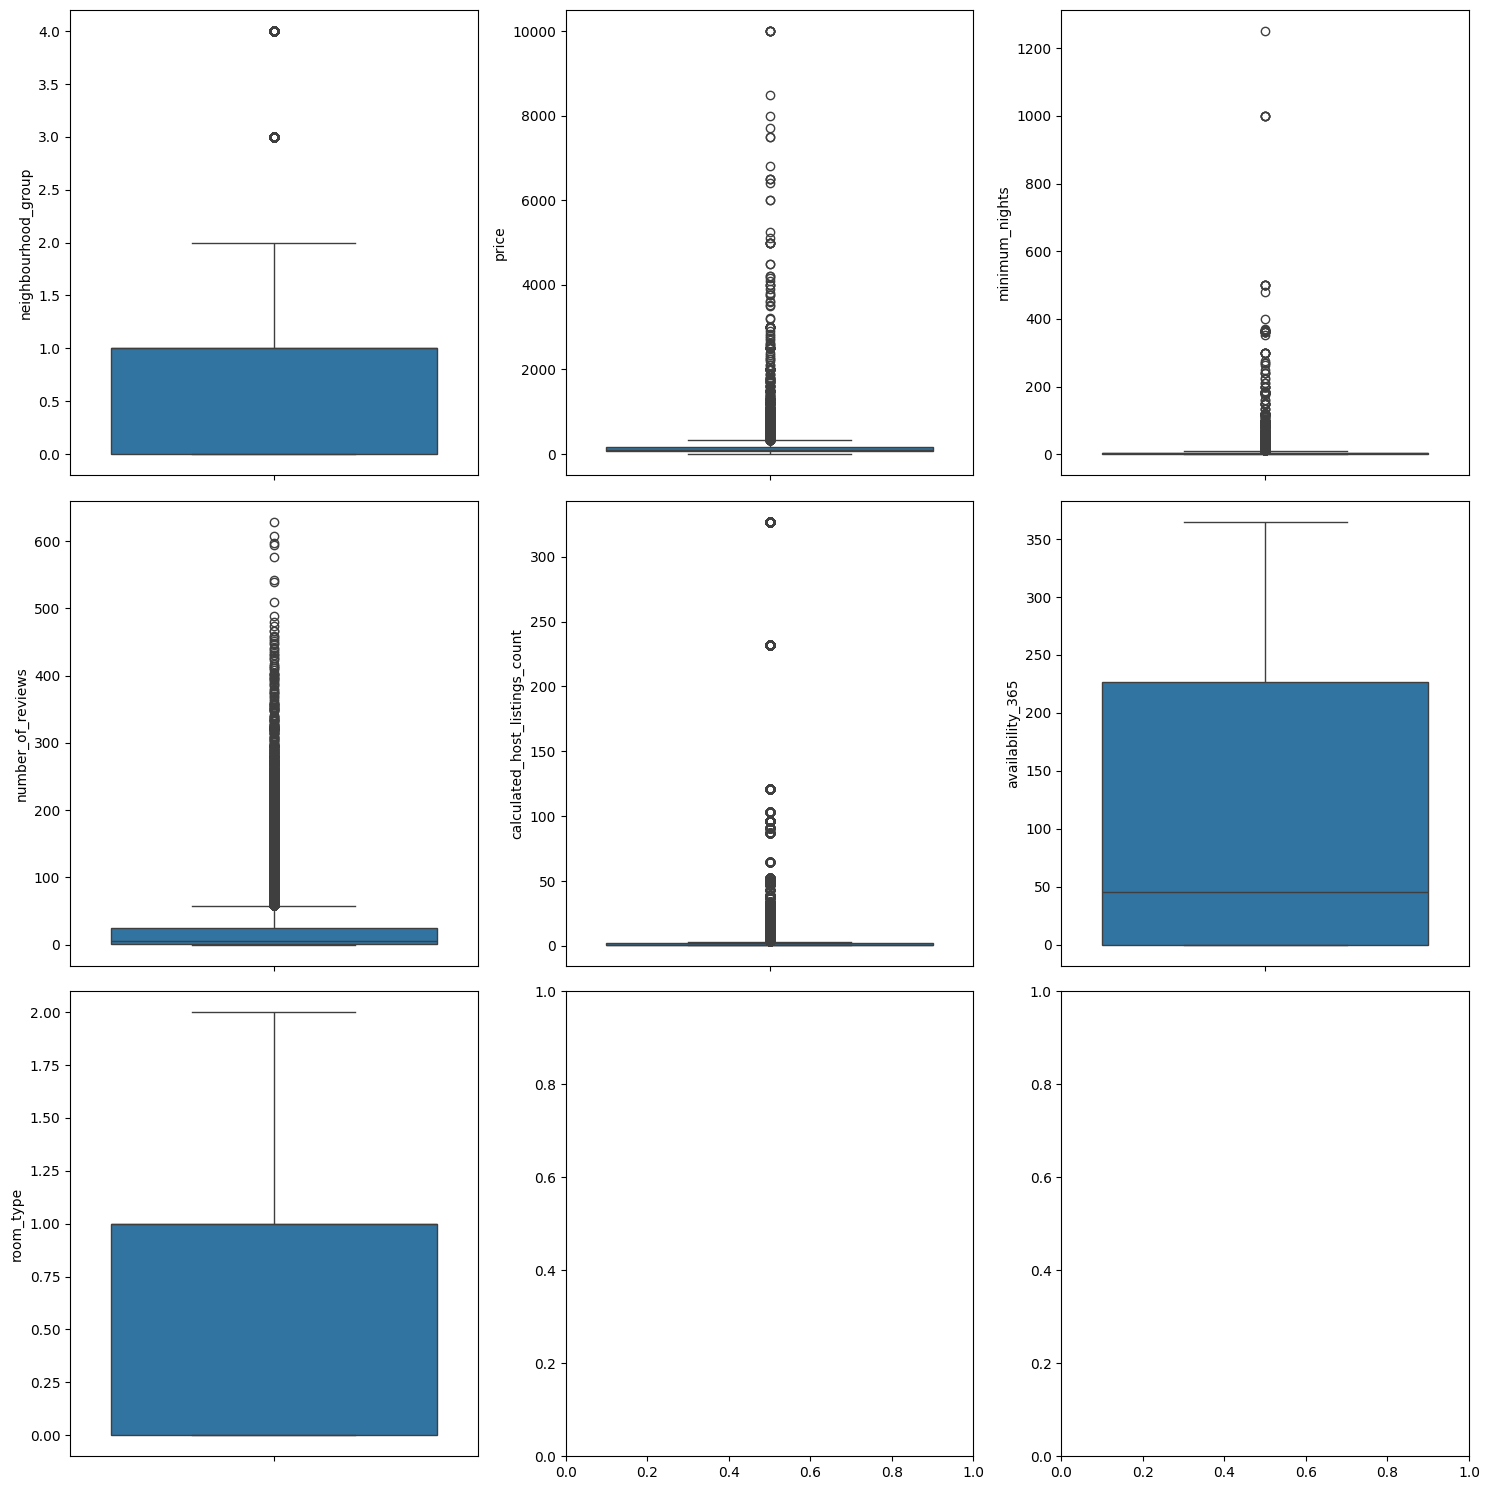

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

In [ ]:
#Estadistica generales para el precio

price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [ ]:
#Los precios que estan por encima de 334
precio_alto = df[df["price"] > 334]
precio_alto


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,15396,60278,1,14,40.74623,-73.99530,1,375,180,5,1,180
85,19601,74303,0,32,40.69723,-73.99268,1,800,1,25,1,7
103,23686,93790,1,11,40.73096,-74.00319,1,500,4,46,2,243
114,26933,72062,1,19,40.72540,-73.98157,1,350,2,7,4,298
121,27659,119588,0,10,40.66499,-73.97925,1,400,2,16,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,73211393,2,25,40.75508,-73.93258,1,350,2,0,1,364
48833,36450896,29741813,1,43,40.70605,-74.01042,1,475,2,0,1,64
48839,36452721,274079964,0,73,40.59866,-73.95661,0,800,1,0,1,23
48842,36453160,224171371,1,14,40.75204,-74.00292,1,350,1,0,1,9


In [ ]:
#ver cuandos alojamientos tienen el precio alto
precio_alto.host_id.value_counts()

host_id
219517861    55
107434423    52
205031545    49
30283594     26
200380610    22
             ..
71948176      1
57571805      1
5302382       1
32525834      1
1413546       1
Name: count, Length: 2447, dtype: int64

In [ ]:
low = df[df['price'] <= 300].shape[0]
high = df[df['price'] >= 500].shape[0]

print("Cuantos alojamientos tienen un precio mayor a 200: ", low)
print("Cuantos alojamientos tienen un precio menor o igual 1000: ", high)

Cuantos alojamientos tienen un precio mayor a 200:  45538
Cuantos alojamientos tienen un precio menor o igual 1000:  1235


In [ ]:
#Estadisticas generales de estadia minima
nights_stats = df["minimum_nights"].describe()
nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
#Dispersion de estadia minima y valores atipicos en minimun_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
print(nights_iqr)
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr
print(f"{round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

11.0 and -5.0, with an interquartile range of 4.0


In [ ]:
estadia_min = df[df["minimum_nights"] <= 12]
estadia_min

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,2595,2845,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,3647,4632,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,3831,4869,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,5022,7192,1,4,40.79851,-73.94399,1,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,0,6,40.67853,-73.94995,0,70,2,0,2,9
48891,36485057,6570630,0,21,40.70184,-73.93317,0,40,4,0,2,36
48892,36485431,23492952,1,2,40.81475,-73.94867,1,115,10,0,1,27
48893,36485609,30985759,1,7,40.75751,-73.99112,2,55,1,0,6,2


In [ ]:
#Estadia minimas y maximas
min_1 = df[df["minimum_nights"] == 1].shape[0]
min_2 = df[df["minimum_nights"] >= 2].shape[0]
min_4 = df[df["minimum_nights"] >= 4].shape[0]
max_7 = df[df["minimum_nights"] >= 7].shape[0]
max_10 = df[df["minimum_nights"] >= 12].shape[0]

print(min_1)
print(min_2)
print(min_4)
print(max_7)
print(max_10)

12720
36175
16480
9391
6607


In [ ]:
#Vistas al alojamiento
review_stats = df["number_of_reviews"].describe()
review_stats

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
review_iqr = review_stats["75%"] - review_stats["25%"]
print(review_iqr)
upper_limit = review_stats["75%"] + 3 * review_iqr
lower_limit = review_stats["25%"] - 3 * review_iqr
print(f"Review a los alojamientos {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

23.0
Review a los alojamientos 58.5 and -33.5, with an interquartile range of 23.0


In [ ]:
anfitriones_list = df["calculated_host_listings_count"].describe()
anfitriones_list

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#Distribucion de alojamiento por anfitrion y valores atipicos

hostlist_iqr = anfitriones_list["75%"] - anfitriones_list["25%"]
print(hostlist_iqr)
upper_limit = anfitriones_list["75%"] + 3 * hostlist_iqr
lower_limit = anfitriones_list["25%"] - 3 * hostlist_iqr

print(f"Lista de anfitriones {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

#Cantidad de alojamientos por anfitrion desde 0 hasta 4

Total_host = sum(1 for x in df["calculated_host_listings_count"] if x in range(0, 5))
host_1 = df[df["calculated_host_listings_count"] == 1].shape[0]
host_2 = df[df["calculated_host_listings_count"] > 2].shape[0]

print(Total_host)
print(host_1)
print(host_2)

1.0
Lista de anfitriones 3.5 and -0.5, with an interquartile range of 1.0
43254
32303
9934


In [ ]:
#Cantidad de alojamiento de anfritriones mayores a 5
Anfitriones = df[df["calculated_host_listings_count"] > 5]
Anfitriones

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,0,0,40.64749,-73.97237,0,149,1,9,6,365
21,8024,22486,0,16,40.68069,-73.97706,0,130,2,130,6,347
22,8025,22486,0,16,40.67989,-73.97798,0,80,1,39,6,364
23,8110,22486,0,16,40.68001,-73.97865,0,110,2,71,6,304
92,20755,51038,0,3,40.68634,-73.96600,0,98,7,16,6,185
...,...,...,...,...,...,...,...,...,...,...,...,...
48851,36455649,263504959,2,129,40.69137,-73.86591,0,35,1,0,8,341
48857,36457832,63272360,2,129,40.69482,-73.86618,1,85,3,0,6,300
48867,36473044,261338177,0,67,40.59080,-73.97116,2,25,1,0,6,338
48868,36473253,261338177,0,67,40.59118,-73.97119,2,25,7,0,6,365


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("price", axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,25674366,9038810,0,12,40.71577,-73.95530,1,3,11,1,1
23615,19100971,81745867,1,30,40.84917,-73.94048,0,2,2,1,0
31183,24209867,1218837,0,6,40.68993,-73.95947,0,2,0,2,0
29260,22451798,4126686,0,6,40.68427,-73.93118,1,3,87,1,267
7275,5344850,27698133,2,31,40.74705,-73.89564,0,5,13,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
num_variables = ["minimum_nights", "calculated_host_listings_count", "availability_365"]

scaler = StandardScaler()
scaler.fit(X_train[num_variables])
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,minimum_nights,calculated_host_listings_count,availability_365
32645,-0.193025,-0.186570,-0.852862
23615,-0.239596,-0.186570,-0.860447
31183,-0.239596,-0.156424,-0.860447
29260,-0.193025,-0.186570,1.164663
7275,-0.099884,-0.186570,-0.860447


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[num_variables])

X_train_num_mm = scaler.transform(X_train[num_variables])
X_train_num_mm = pd.DataFrame(X_train_num_mm, index = X_train.index, columns = num_variables)

X_test_num_mm = scaler.transform(X_test[num_variables])
X_test_num_mm = pd.DataFrame(X_test_num_mm, index = X_test.index, columns = num_variables)

X_train_num_mm.head()

,minimum_nights,calculated_host_listings_count,availability_365
32645,0.001601,0.000000,0.002740
23615,0.000801,0.000000,0.000000
31183,0.000801,0.003067,0.000000
29260,0.001601,0.000000,0.731507
7275,0.003203,0.000000,0.000000


In [ ]:
#Asignar valores a las categorias que tienen valores indiscretos 
from sklearn.preprocessing import LabelEncoder
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

variables = ['room_type', 'neighbourhood_group']

label_encoder_neighbourhood_group = LabelEncoder()
label_encoder_room_type = LabelEncoder()

label_encoder_neighbourhood_group.fit(X_train['neighbourhood_group'])
label_encoder_room_type.fit(X_train['room_type'])

X_train_cat_le['neighbourhood_group'] = label_encoder_neighbourhood_group.transform(X_train['neighbourhood_group'])
X_train_cat_le['room_type'] = label_encoder_room_type.transform(X_train['room_type'])

X_test_cat_le['neighbourhood_group'] = label_encoder_neighbourhood_group.transform(X_test['neighbourhood_group'])
X_test_cat_le['room_type'] = label_encoder_room_type.transform(X_test['room_type'])

X_train_cat_le.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,25674366,9038810,0,12,40.71577,-73.95530,1,3,11,1,1
23615,19100971,81745867,1,30,40.84917,-73.94048,0,2,2,1,0
31183,24209867,1218837,0,6,40.68993,-73.95947,0,2,0,2,0
29260,22451798,4126686,0,6,40.68427,-73.93118,1,3,87,1,267
7275,5344850,27698133,2,31,40.74705,-73.89564,0,5,13,1,0


In [ ]:
X_train_cat_le.head(50)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,25674366,9038810,0,12,40.71577,-73.95530,1,3,11,1,1
23615,19100971,81745867,1,30,40.84917,-73.94048,0,2,2,1,0
31183,24209867,1218837,0,6,40.68993,-73.95947,0,2,0,2,0
29260,22451798,4126686,0,6,40.68427,-73.93118,1,3,87,1,267
7275,5344850,27698133,2,31,40.74705,-73.89564,0,5,13,1,0
26011,20761404,51501835,1,7,40.76354,-73.99283,1,30,3,31,270
46572,35318634,7933261,1,28,40.76786,-73.95639,1,7,1,1,43
19902,15952702,1499220,1,11,40.73316,-74.00476,1,1,42,1,4
14159,10886628,56412357,0,20,40.72527,-73.94803,0,1,0,1,0
28528,22108302,123605746,0,15,40.67520,-73.94366,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder.fit(X_train[variables])
X_train_cat_ohe = onehot_encoder.transform(X_train[variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(variables))

X_train_cat_ohe.head()

,room_type_0,room_type_1,room_type_2,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4
32645,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23615,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31183,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29260,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data = {'Tamaño': ['Pequeño', 'Mediano', 'Grande', 'Mediano', 'Pequeño']}
df = pd.DataFrame(data)
ordinal_encoder = OrdinalEncoder(categories=[['Pequeño', 'Mediano', 'Grande']])
df['Tamaño_Ordinal'] = ordinal_encoder.fit_transform(df[['Tamaño']])

print(df)

    Tamaño  Tamaño_Ordinal
0  Pequeño             0.0
1  Mediano             1.0
2   Grande             2.0
3  Mediano             1.0
4  Pequeño             0.0


In [ ]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_ohe], axis=1)

X_train_final.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type_0,room_type_1,room_type_2,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4
32645,-0.193025,-0.186570,-0.852862,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23615,-0.239596,-0.186570,-0.860447,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31183,-0.239596,-0.156424,-0.860447,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29260,-0.193025,-0.186570,1.164663,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7275,-0.099884,-0.186570,-0.860447,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selection_model = SelectKBest(score_func = f_classif, k = 5)

selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel.head()

,calculated_host_listings_count,room_type_0,room_type_1,room_type_2,neighbourhood_group_1
0,-0.186570,0.0,1.0,0.0,0.0
1,-0.186570,1.0,0.0,0.0,1.0
2,-0.156424,1.0,0.0,0.0,0.0
3,-0.186570,0.0,1.0,0.0,0.0
4,-0.186570,1.0,0.0,0.0,0.0


In [ ]:
selected_features = X_train_final.columns[selection_model.get_support()]

selected_features

Index(['calculated_host_listings_count', 'room_type_0', 'room_type_1',
       'room_type_2', 'neighbourhood_group_1'],
      dtype='object')